## Analysing the correlation between the purity of the drugs and the total deaths

We will analyse the purity of the drugs in EU and see the difference the purity of a drug makes on the total number of overdose deaths. The purity of the drug has effect on the deaths because, often times the purity of the drug changes and is not taken into account and that is how many people die. We have 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dMale = pd.read_excel('./tables/drugDeaths/maleDeaths.xlsx')
dFemale = pd.read_excel('./tables/drugDeaths/femaleDeaths.xlsx')
pCannabis = pd.read_excel('./tables/pricePurity/purityCannabisMean.xlsx')
pBrownheroin = pd.read_excel('./tables/pricePurity/purityBrownHeroinMean.xlsx')
pCocaine = pd.read_excel('./tables/pricePurity/purityCocaineMean.xlsx')
pEctasy = pd.read_excel('./tables/pricePurity/purityEctasyMean.xlsx')
pWhiteHeroin = pd.read_excel('./tables/pricePurity/purityWhiteHeroinMean.xlsx')

In [10]:
Deaths = dMale + dFemale
Deaths = Deaths.drop('Country', axis=1).drop('Unnamed: 24', axis=1)
pCannabis = pCannabis.drop(['Country', 'Study'], axis = 1)
pBrownheroin = pBrownheroin.drop(['Country', 'Study'], axis = 1)

In [15]:
Deaths

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,154.0,165.0,153.0,122.0,138.0,161.0,201.0,187.0,206.0,201.0,...,185.0,163.0,139.0,139.0,167.0,128.0,109.0,136.0,191.0,170.0
1,NaN,NaN,NaN,61.0,74.0,72.0,94.0,106.0,155.0,146.0,...,74.0,97.0,NaN,NaN,NaN,113.0,48.0,123.0,137.0,132.0
2,18.0,22.0,17.0,15.0,21.0,24.0,25.0,41.0,38.0,74.0,...,26.0,15.0,13.0,24.0,41.0,28.0,21.0,16.0,NaN,19.0
3,65.0,56.0,54.0,59.0,48.0,49.0,59.0,73.0,61.0,87.0,...,88.0,57.0,52.0,64.0,51.0,48.0,34.0,NaN,NaN,NaN
4,16.0,6.0,9.0,6.0,3.0,5.0,8.0,9.0,12.0,11.0,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42.0,32.0,44.0,NaN,NaN,38.0,28.0,55.0,49.0,44.0,...,57.0,55.0,44.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,237.0,203.0,249.0,249.0,249.0,301.0,254.0,277.0,267.0,...,NaN,NaN,NaN,221.0,240.0,217.0,243.0,256.0,242.0,214.0
7,110.0,114.0,88.0,98.0,111.0,170.0,123.0,101.0,133.0,67.0,...,98.0,36.0,86.0,45.0,31.0,22.0,7.0,4.0,NaN,NaN
8,200.0,194.0,166.0,176.0,201.0,213.0,197.0,156.0,175.0,169.0,...,135.0,101.0,97.0,110.0,134.0,119.0,84.0,98.0,107.0,51.0
9,NaN,NaN,373.0,370.0,349.0,264.0,340.0,392.0,365.0,374.0,...,267.0,231.0,242.0,272.0,247.0,118.0,143.0,228.0,393.0,465.0


### Cannabis

In [11]:
purityCannabis = pd.DataFrame()
for year in range(1995, 2018):
    purityCannabis = purityCannabis.append({'Year': year, 'CannabisPurity': pCannabis[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityCannabis['Year'] = purityCannabis['Year'].astype(int)    

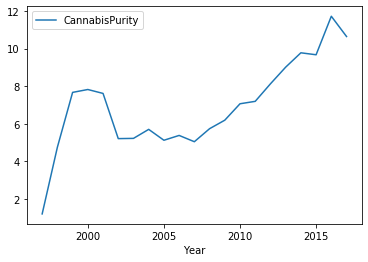

In [12]:
purityCannabis.plot(x='Year', y='CannabisPurity').locator_params(integer=True)

For a non lethal drug we can only say that through the years its purity percentage rose from 1% to 10%.

### Brown Heroin

In [13]:
purityHeroin = pd.DataFrame()
for year in range(1995, 2018):
    purityHeroin = purityHeroin.append({'Year': year, 'brownHeroinPurity': pBrownheroin[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityHeroin['Year'] = purityHeroin['Year'].astype(int)

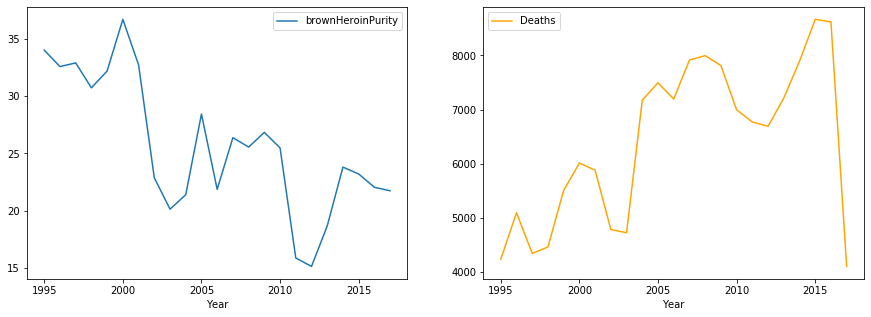

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
purityHeroin.plot(x='Year', y='brownHeroinPurity', ax = axes[0]).locator_params(integer=True)
purityHeroin.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

From the brown heroin purity we can only see a relevant differnence in the year 2000, where purity really rose up and the total deaths spiked. We can see a resemblance through the other years.

### White Heroin

In [15]:
purityWhiteHeroin = pd.DataFrame()
for year in range(1995, 2018):
    purityWhiteHeroin = purityWhiteHeroin.append({'Year': year, 'whiteHeroinPurity': pWhiteHeroin[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityWhiteHeroin['Year'] = purityWhiteHeroin['Year'].astype(int)

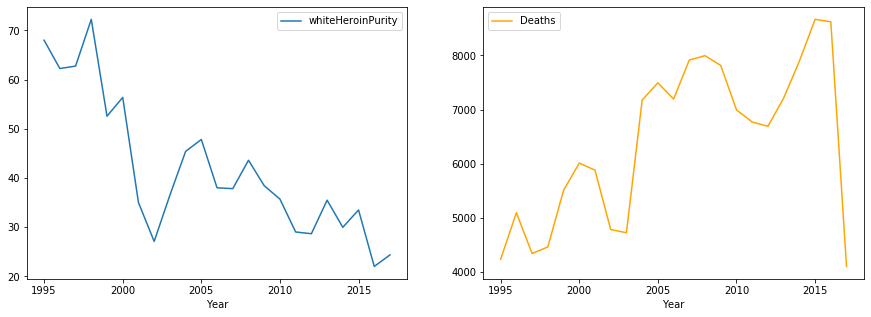

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
purityWhiteHeroin.plot(x='Year', y='whiteHeroinPurity', ax = axes[0]).locator_params(integer=True)
purityWhiteHeroin.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

For white heroin we can see the spike around 2005.

### Cocaine

In [17]:
purityCocaine = pd.DataFrame()
for year in range(1995, 2018):
    purityCocaine = purityCocaine.append({'Year': year, 'cocainePurity': pCocaine[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityCocaine['Year'] = purityCocaine['Year'].astype(int)

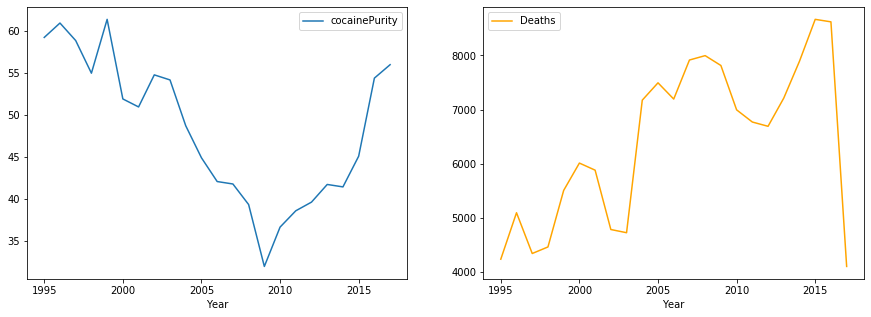

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
purityCocaine.plot(x='Year', y='cocainePurity', ax = axes[0]).locator_params(integer=True)
purityCocaine.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

### Ectasy

In [28]:
purityEctasy = pd.DataFrame()
for year in range(1995, 2018):
    purityEctasy = purityEctasy.append({'Year': year, 'ectasyPurity': pEctasy[year].mean(), 'Deaths': Deaths[year].sum()},ignore_index=True)
purityEctasy['Year'] = purityEctasy['Year'].astype(int)

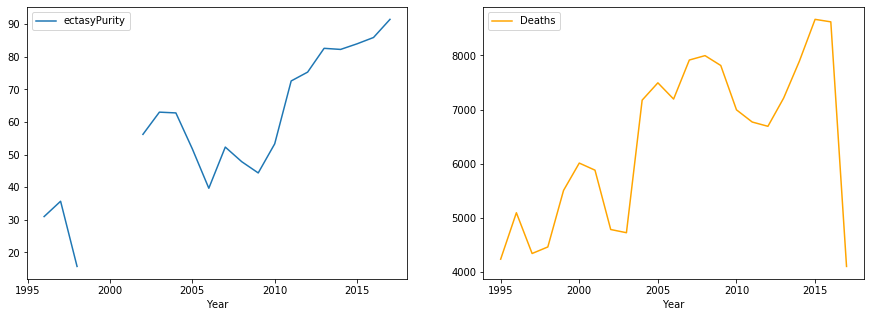

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
purityEctasy.plot(x='Year', y='ectasyPurity', ax = axes[0]).locator_params(integer=True)
purityEctasy.plot(x='Year',y='Deaths', ax = axes[1], color='orange').locator_params(integer=True)

The drug Ectasy wasn't popular around 2000, so its purity wasn't changed form 1999 to 2001.